<a href="https://colab.research.google.com/github/AisIzmailova/Aisulu-Izmailova/blob/master/DL_neural_network_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction to regression with Neural Network in Tensorflow

In [ ]:
#Import tensorflow
import tensorflow as tf
print(tf.__version__)

2.13.0


##Creating some data to view and fit

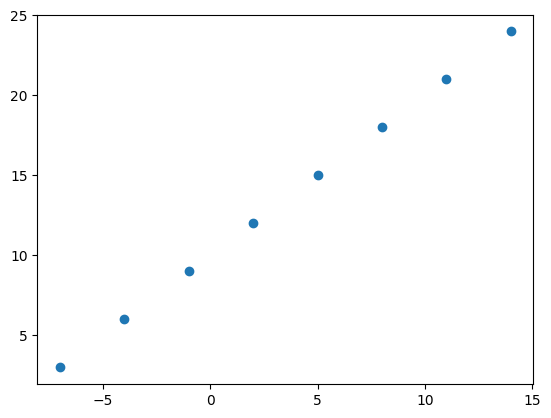

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

#Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

#Visualize
plt.scatter(X,y)

In [ ]:
#Relationship between X and y
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

##Input and output shapes

In [ ]:
#Create a demo tensor for our hhousing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [ ]:
#Turn numpy arrays into tensors
X = tf.cast(tf.constant(X), dtype = tf.float32)
y = tf.cast(tf.constant(y),  dtype = tf.float32)
X,y, X.ndim, y.ndim

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>,
 1,
 1)

In [ ]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

(TensorShape([8]), TensorShape([8]))

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

##Steps in modelling with Tensorflow

1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep leaning model.
2. **Compiling a model** - define the loss function (in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model).
3. **Fitting a model** - letting a model try to find patterns between X & y (features and labels)

In [ ]:
tf.random.set_seed(42)

#1. Create a model using Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model.compile(loss=tf.keras.losses.mae, #mean absolute error between actual value and prediction
              optimizer=tf.keras.optimizers.SGD(), #stochastic gradient descent
              metrics = ["mae"])

#3.Fit the model
model.fit(tf.expand_dims(X,axis=1),y,epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 361ms/step - loss: 18.7578 - mae: 18.7578
Epoch 2/5
1/1 [==============================] - 0s 10ms/step - loss: 18.4765 - mae: 18.4765
Epoch 3/5
1/1 [==============================] - 0s 9ms/step - loss: 18.1953 - mae: 18.1953
Epoch 4/5
1/1 [==============================] - 0s 9ms/step - loss: 17.9140 - mae: 17.9140
Epoch 5/5
1/1 [==============================] - 0s 10ms/step - loss: 17.6328 - mae: 17.6328


In [ ]:
#Predict
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 65ms/step


array([[-14.953808]], dtype=float32)

##Improving model

We can improve the mode by altering the steps we took to create the model:

1. **Creating model** - here we might add more layers, increase the number of hidden units (all called units) within each of the hidden layers, change the activation function of each layer.
2. **Compiling model** - here we might change the optimization functions or perhaps the learning rate of the optimiation fucntion.
3. **Fitting model** - here we might fit a model for more epochs (leave it training for longer) or on more data (give the model more examples to learn from).

In [ ]:
#1. Create a model using Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation ="relu"),
    tf.keras.layers.Dense(100, activation ="relu"),
    tf.keras.layers.Dense(100, activation ="relu"),
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model.compile(loss=tf.keras.losses.mae, #mean absolute error between actual value and prediction
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), #stochastic gradient descent
              metrics = ["mae"])

#3.Fit the model
model.fit(tf.expand_dims(X,axis=1),tf.expand_dims(y,axis=1),epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 13.0686 - mae: 13.0686
Epoch 2/100
1/1 [==============================] - 0s 12ms/step - loss: 9.8564 - mae: 9.8564
Epoch 3/100
1/1 [==============================] - 0s 11ms/step - loss: 6.2305 - mae: 6.2305
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 4.7134 - mae: 4.7134
Epoch 5/100
1/1 [==============================] - 0s 13ms/step - loss: 5.7374 - mae: 5.7374
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 5.0729 - mae: 5.0729
Epoch 7/100
1/1 [==============================] - 0s 17ms/step - loss: 3.9138 - mae: 3.9138
Epoch 8/100
1/1 [==============================] - 0s 14ms/step - loss: 4.0756 - mae: 4.0756
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 4.0098 - mae: 4.0098
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 3.5480 - mae: 3.5480
Epoch 11/100
1/1 [==============================] - 0s 10ms/step - lo

In [ ]:
#Predict
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 134ms/step


array([[29.191484]], dtype=float32)

##Evaluating model

In [ ]:
X = tf.range (-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

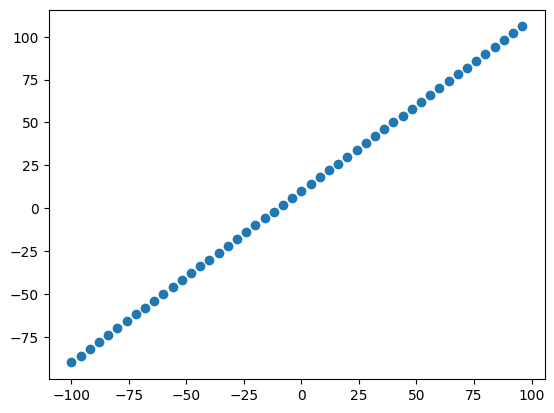

In [ ]:
#Visuzalize the data
plt.scatter(X,y)

In [ ]:
#Split data into training and testing sets
X_train = X[:40]
X_test = X[40:]
y_train = y[:40]
y_test = y[40:]
len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

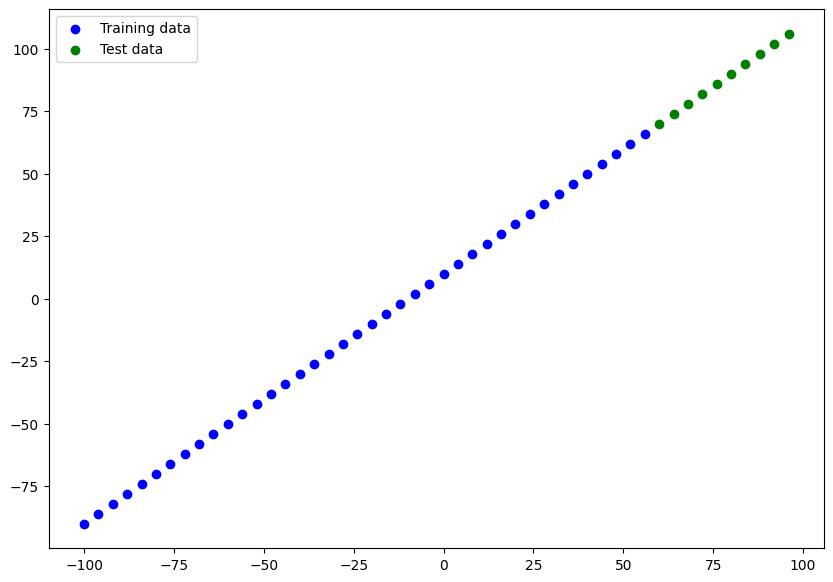

In [ ]:
#Visuzalize the data
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, c='b', label='Training data')
plt.scatter(X_test, y_test, c='g', label='Test data')
plt.legend()

In [ ]:
#1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer =tf.keras.optimizers.SGD(),
              metrics = ["mae"])

In [ ]:
#Create a model which builds automaticall by defining the input_shape argumentin the first layer
tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape = [1])
])

#2. Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

In [ ]:
model.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_66 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* Total params - total number of parameters in the model
* Trainable params - these are the parameters (patterns) the model can update as it trains
* Non-tainable params - these are parameters that aren't updated during training (this is typical whe you bring in already learn patterns or parameters from other models during transfer learning)\
📖 Read: For a more in-depth overview of the trainable parameters within layer, check out MIT's introduction to deep learning video.

In [ ]:
#3. Fit the model
model.fit(X_train, y_train, epochs=100, verbose=0)

In [ ]:
model.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_66 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#Create a model which builds automaticall by defining the input_shape argumentin the first layer
tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape = [1], name="input_layer"),
    tf.keras.layers.Dense(1, name="output_layer")
], name = "one_of_many_models")

#2. Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

model.summary()

Model: "one_of_many_models"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#3. Fit the model
model.fit(X_train, y_train, epochs=100, verbose=0)

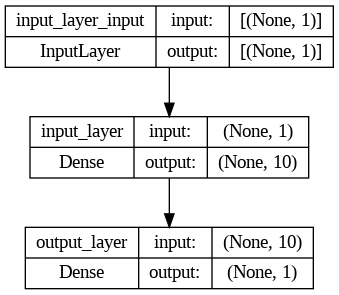

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model=model,show_shapes=True)

##Visualizing model predictions

To visualize predictions, it is a good idea to plot them against the ground truth labels.

Often you will see this in the form of `y_test` or `y_true` versus `y_pred`.

In [ ]:
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 64ms/step


array([[34.888508],
       [37.118057],
       [39.347607],
       [41.577156],
       [43.806705],
       [46.036255],
       [48.265804],
       [50.495354],
       [52.724903],
       [54.95445 ]], dtype=float32)

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
#Let's create a plotting function
def plot_predictions(train_data = X_train,
                    train_labels = y_train,
                    test_data = X_test,
                    test_lables = y_test,
                    predictions = y_pred):
  plt.figure(figsize=(10,7))
  plt.scatter(train_data, train_labels, c='b', label = "Training data")
  plt.scatter(test_data, test_lables, c='g', label = "Testing data")
  plt.scatter(test_data, predictions, c='r', label = "Predictions")
  plt.legend()

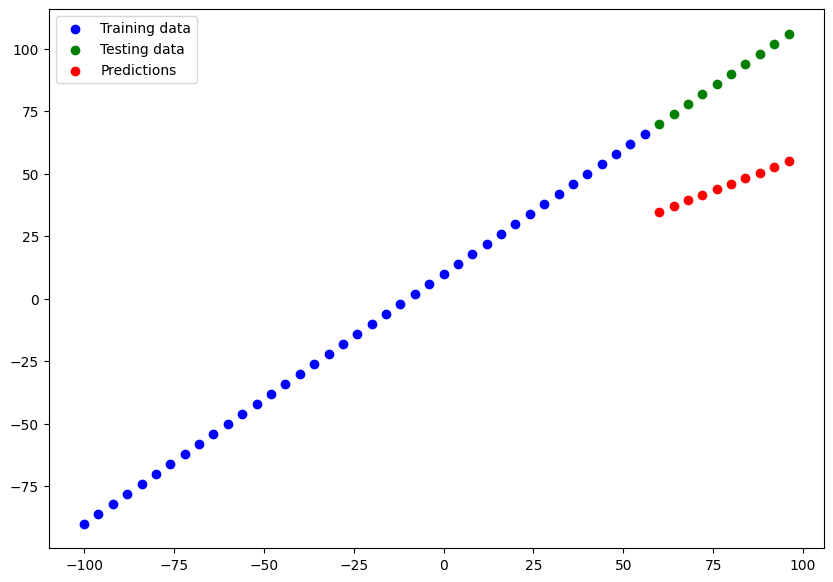

In [ ]:
plot_predictions(train_data = X_train,
                    train_labels = y_train,
                    test_data = X_test,
                    test_lables = y_test,
                    predictions = y_pred)

In [ ]:
X_train, X_train.ndim

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 1)

In [ ]:
X_1 = tf.expand_dims(X_train,axis=1)
X_1, X_1.ndim

(<tf.Tensor: shape=(40, 1), dtype=int32, numpy=
 array([[-100],
        [ -96],
        [ -92],
        [ -88],
        [ -84],
        [ -80],
        [ -76],
        [ -72],
        [ -68],
        [ -64],
        [ -60],
        [ -56],
        [ -52],
        [ -48],
        [ -44],
        [ -40],
        [ -36],
        [ -32],
        [ -28],
        [ -24],
        [ -20],
        [ -16],
        [ -12],
        [  -8],
        [  -4],
        [   0],
        [   4],
        [   8],
        [  12],
        [  16],
        [  20],
        [  24],
        [  28],
        [  32],
        [  36],
        [  40],
        [  44],
        [  48],
        [  52],
        [  56]], dtype=int32)>,
 2)

In [ ]:
y_train, y_train.ndim

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>,
 1)

In [ ]:
#1. Create a model using Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation ="relu"),
    tf.keras.layers.Dense(100, activation ="relu"),
    tf.keras.layers.Dense(100, activation ="relu"),
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model.compile(loss=tf.keras.losses.mae, #mean absolute error between actual value and prediction
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), #stochastic gradient descent
              metrics = ["mae"])

#3.Fit the model
model.fit(tf.expand_dims(X_train,axis=1), tf.expand_dims(y_train, axis=1), epochs=100, verbose=0)

In [ ]:
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 75ms/step


array([[ 69.27887 ],
       [ 73.27365 ],
       [ 77.26844 ],
       [ 81.263214],
       [ 85.25809 ],
       [ 89.25297 ],
       [ 93.24784 ],
       [ 97.24273 ],
       [101.23766 ],
       [105.2326  ]], dtype=float32)

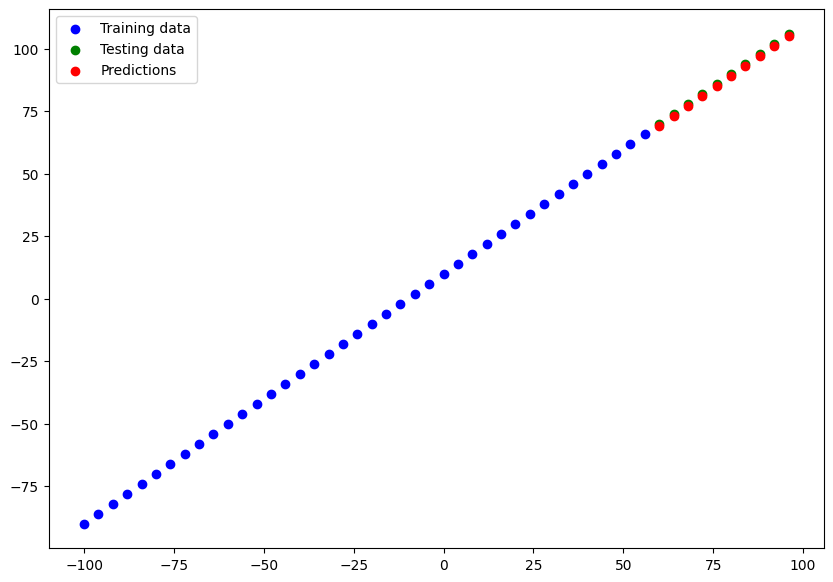

In [ ]:
plot_predictions(train_data = X_train,
                    train_labels = y_train,
                    test_data = X_test,
                    test_lables = y_test,
                    predictions = y_pred)

In [ ]:
model.summary()

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_67 (Dense)            (None, 100)               200       
                                                                 
 dense_68 (Dense)            (None, 100)               10100     
                                                                 
 dense_69 (Dense)            (None, 100)               10100     
                                                                 
 dense_70 (Dense)            (None, 1)                 101       
                                                                 
Total params: 20501 (80.08 KB)
Trainable params: 20501 (80.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


##Evaluate model with regression evaluation metrics

Depending on the problem we are working on, there will be different evaluation metrics to evaluate our model's performance.

Since we are working on a regression, two of the main metrics:
* MAE - mean absolute error, "on average" how wrong is each of the model's predictions - `tf.keras.losses.mae()` or `tf.metrics.mean_absolute_error()`
* MSE - mean square error, "square the average errors" - `tf.keras.losses.mse()` or `tf.metrics.mean_squared_error()`
* Huber - `tf.keras.losses.huber()`

In [ ]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 133ms/step - loss: 0.7444 - mae: 0.7444


[0.7443939447402954, 0.7443939447402954]

In [ ]:
#Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true = y_test,
                                     y_pred = tf.constant(y_pred))
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([18.72113 , 15.381079, 12.838936, 11.094714, 10.148382, 10.      ,
       10.649569, 12.097092, 14.342598, 17.386078], dtype=float32)>

In [ ]:
y_pred,y_pred.ndim

(array([[ 69.27887 ],
        [ 73.27365 ],
        [ 77.26844 ],
        [ 81.263214],
        [ 85.25809 ],
        [ 89.25297 ],
        [ 93.24784 ],
        [ 97.24273 ],
        [101.23766 ],
        [105.2326  ]], dtype=float32),
 2)

In [ ]:
tf.constant(y_pred)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 69.27887 ],
       [ 73.27365 ],
       [ 77.26844 ],
       [ 81.263214],
       [ 85.25809 ],
       [ 89.25297 ],
       [ 93.24784 ],
       [ 97.24273 ],
       [101.23766 ],
       [105.2326  ]], dtype=float32)>

In [ ]:
y_test, y_test.ndim

(<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>,
 1)

In [ ]:
#Change the dimension of y_pred to match the dimension of y_test
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 69.27887 ,  73.27365 ,  77.26844 ,  81.263214,  85.25809 ,
        89.25297 ,  93.24784 ,  97.24273 , 101.23766 , 105.2326  ],
      dtype=float32)>

In [ ]:
mae = tf.metrics.mean_absolute_error(y_true = y_test,
                                     y_pred = tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=0.74439394>

In [ ]:
#Calculate mean square error
mse = tf.metrics.mean_squared_error(y_true = y_test,
                                     y_pred = tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=0.55434024>

In [ ]:
#Let's define functions to reuse mae and mse
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true = y_true,
                                        y_pred = tf.squeeze(y_pred))

def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true = y_true,
                                       y_pred = tf.squeeze(y_pred))

##Running experiments to improve model

1. Get more data - get more examples for your model to train on (more opportunities to learn patterns or relationships between features and labels)
2. Make your model larger (using more complex model) - this might come in the form of more layers or more hidden units in each layer.
3. Train for longer - give your model more of a chance to find patterns in the data.

Let's do 3 eperiments
1. `model_1` - same as original model, 1 layer, trained for 100 epochs
2. `model_2` - 2 layers, trained for 100 epochs
3. `model_3` - 2 layers, trained for 500 epochs

In [ ]:
#Build model_1

#1.Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#2.Compile the model
model_1.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["mae"])
#3.Fit the model
model_1.fit(tf.expand_dims(X_train,axis=1), tf.expand_dims(y_train, axis=1), epochs=100, verbose=0)

1/1 [==============================] - 0s 43ms/step


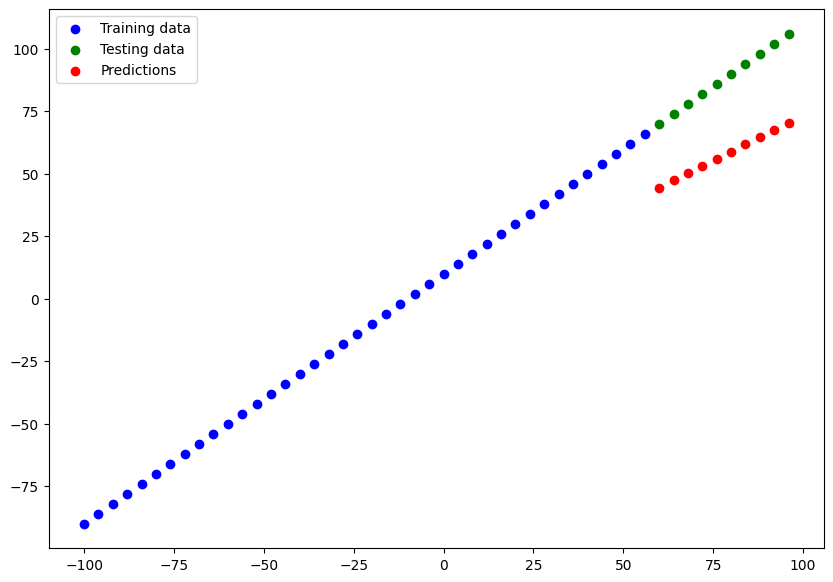

In [ ]:
#Make predictions and visuzlize model_1
y_pred_1 = model_1.predict(X_test)
plot_predictions(predictions=y_pred_1)

In [ ]:
#Calculate model_1 evaluation metrics
mae_1 = mae(y_test, y_pred_1)
mse_1 = mse(y_test, y_pred_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=30.573257>,
 <tf.Tensor: shape=(), dtype=float32, numpy=945.1211>)

In [ ]:
#Build model_2

#1.Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])

#2.Compile the model
model_2.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["mae"])
#3.Fit the model
model_2.fit(tf.expand_dims(X_train,axis=1), tf.expand_dims(y_train, axis=1), epochs=100, verbose=0)


1/1 [==============================] - 0s 51ms/step


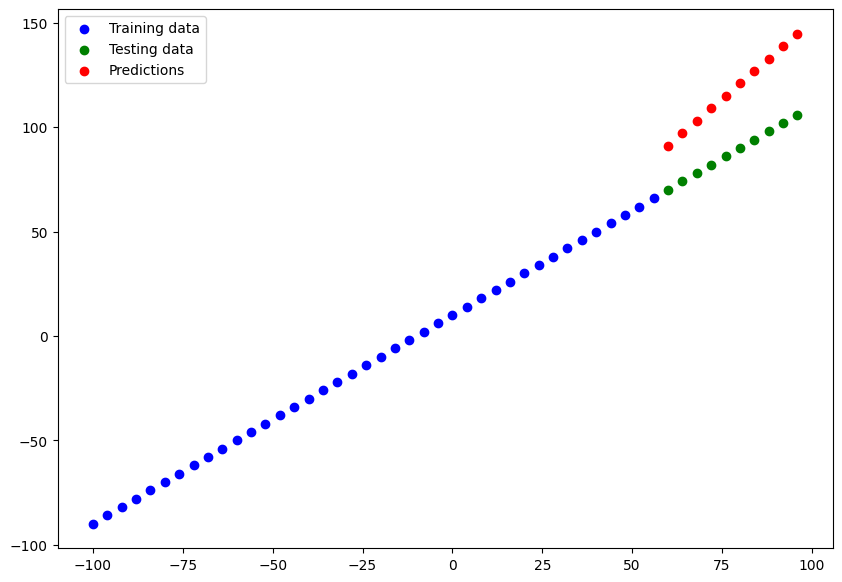

In [ ]:
#Make predictions and visuzlize model_2
y_pred_2 = model_2.predict(X_test)
plot_predictions(predictions=y_pred_2)

In [ ]:
#Calculate model_1 evaluation metrics
mae_2 = mae(y_test, y_pred_2)
mse_2 = mse(y_test, y_pred_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=29.979065>,
 <tf.Tensor: shape=(), dtype=float32, numpy=930.271>)

In [ ]:
#Build model_3

#1.Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])

#2.Compile the model
model_3.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["mae"])
#3.Fit the model
model_3.fit(tf.expand_dims(X_train,axis=1), tf.expand_dims(y_train, axis=1), epochs=500, verbose=0)

1/1 [==============================] - 0s 52ms/step


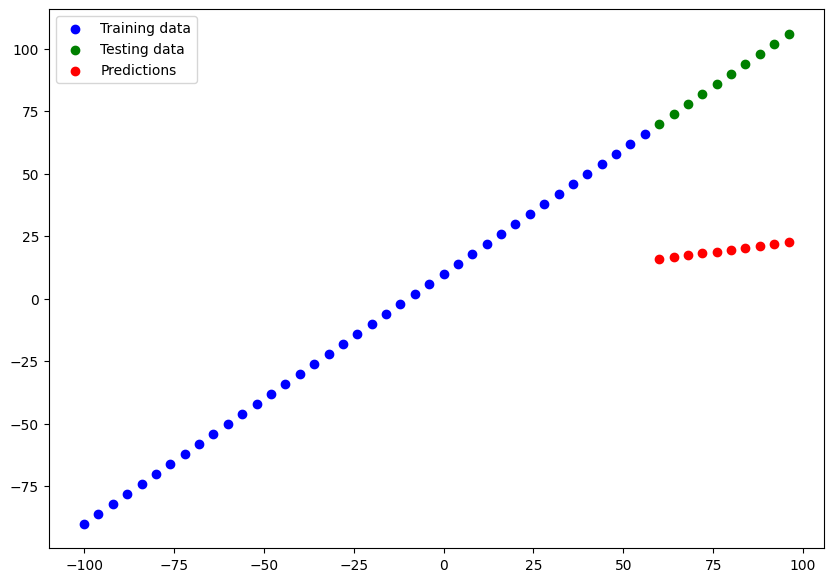

In [ ]:
#Make predictions and visuzlize model_3
y_pred_3 = model_3.predict(X_test)
plot_predictions(predictions=y_pred_3)

In [ ]:
#Calculate model_1 evaluation metrics
mae_3 = mae(y_test, y_pred_3)
mse_3 = mse(y_test, y_pred_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=68.73316>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4810.7954>)

##Compare results of our experiments

In [ ]:
#Let's compare our model's results using pandas dataframe
import pandas as pd
model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                  ["model_3", mae_3.numpy(), mse_3.numpy()]]
all_results = pd.DataFrame(model_results, columns =["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,30.573257,945.121094
1,model_2,29.979065,930.270996
2,model_3,68.733162,4810.795410


##Tracking experiments
One good habit in ML modelling is to track the results of experiments.\
📖 Read:
* https://www.tensorflow.org/tensorboard - a component of the Tensorflow library to help track ML experiments

* https://wandb.ai/site/ - a tool to track ML experiments, plugs directly into TensorBoard

##Saving models

Saving our models allows us to use them outside of Google Colab such as in a web application or mobile app. There are two main formats we can save our models too:

* The SavedModel format
* The HDF5 format

In [ ]:
#Use SavedModel format
model_2.save("best_moel_SavedModel_format")

In [ ]:
#Use HDF5 format
model_2.save("best_model_HDF5_format.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


##Load saved models

In [ ]:
model_SavedModel = tf.keras.models.load_model("best_moel_SavedModel_format")
model_SavedModel.summary()

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_72 (Dense)            (None, 100)               200       
                                                                 
 dense_73 (Dense)            (None, 1)                 101       
                                                                 
Total params: 301 (1.18 KB)
Trainable params: 301 (1.18 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model_HDF5 = tf.keras.models.load_model("best_model_HDF5_format.h5")
model_HDF5.summary()

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_72 (Dense)            (None, 100)               200       
                                                                 
 dense_73 (Dense)            (None, 1)                 101       
                                                                 
Total params: 301 (1.18 KB)
Trainable params: 301 (1.18 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model_2_preds = model_2.predict(X_test)
model_SavedModel_preds = model_SavedModel.predict(X_test)
model_HDF5_preds = model_HDF5.predict(X_test)
model_2_preds, model_SavedModel_preds, model_HDF5_preds

1/1 [==============================] - 0s 73ms/step


(array([[ 91.182274],
        [ 97.13711 ],
        [103.091965],
        [109.04681 ],
        [115.00165 ],
        [120.95649 ],
        [126.91132 ],
        [132.86617 ],
        [138.82103 ],
        [144.77585 ]], dtype=float32),
 array([[ 91.182274],
        [ 97.13711 ],
        [103.091965],
        [109.04681 ],
        [115.00165 ],
        [120.95649 ],
        [126.91132 ],
        [132.86617 ],
        [138.82103 ],
        [144.77585 ]], dtype=float32),
 array([[ 91.182274],
        [ 97.13711 ],
        [103.091965],
        [109.04681 ],
        [115.00165 ],
        [120.95649 ],
        [126.91132 ],
        [132.86617 ],
        [138.82103 ],
        [144.77585 ]], dtype=float32))

In [ ]:
model_2_preds == model_SavedModel_preds

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [ ]:
model_2_preds == model_HDF5_preds

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

##Download a model or any other file from Google Colab

1. Go to "Files" tab -> right click -> Download
2. Use `files.download` method
3. Save it by mounting Google Drive

In [ ]:
#Download file from Google Colab
from google.colab import files
files.download("/content/best_model_HDF5_format.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#Mount Google Drive and save it directly there
!cp /content/best_model_HDF5_format.h5 /content/drive/MyDrive/Colab_files

In [ ]:
!ls /content/drive/MyDrive/Colab_files

best_model_HDF5_format.h5


##Larger example

In [ ]:
X_train, y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

In [ ]:
#Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
#Let's one-hot encode our dataframe
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [ ]:
#Create training and testing sets
X = insurance_one_hot.drop("charges", axis=1)
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [ ]:
y = insurance_one_hot["charges"]
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
len(X), len(X_train), len(y), len(y_train)

(1338, 1070, 1338, 1070)

In [ ]:
tf.random.set_seed(42)
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model.compile(loss = tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.SGD(),
                        metrics=["mae"])
insurance_model.fit(X_train, y_train, epochs=100, verbose=0)

In [ ]:
y_pred = insurance_model.predict(X_test)

9/9 [==============================] - 0s 3ms/step


In [ ]:
insurance_model.evaluate(X_test,y_test)

9/9 [==============================] - 0s 4ms/step - loss: 7236.9482 - mae: 7236.9482


[7236.9482421875, 7236.9482421875]

In [ ]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364485)

In [ ]:
#1. Create a model using Sequential API
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation ="relu"),
    tf.keras.layers.Dense(100, activation ="relu"),
    tf.keras.layers.Dense(100, activation ="relu"),
    tf.keras.layers.Dense(1)
])

#2. Compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae, #mean absolute error between actual value and prediction
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), #stochastic gradient descent
              metrics = ["mae"])

#3.Fit the model
history = insurance_model_2.fit(X_train, y_train, epochs=200, verbose=0)

In [ ]:
insurance_model_2.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 1969.3115 - mae: 1969.3115


[1969.3115234375, 1969.3115234375]

Text(0.5, 0, 'epochs')

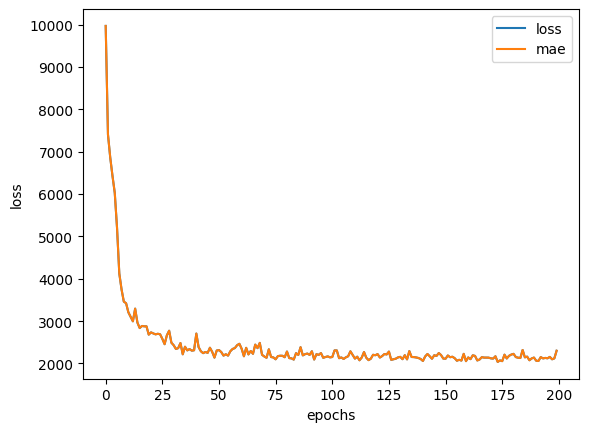

In [ ]:
#Plot history (also known as loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

📖 Read: Tensorflow component to stop the model once it stops improving the metrics - https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping

##Pre-processing data (normalization and standardization)

In terms of scaling, neural networks tend to prefer normalization.

📖 Read: https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


<Axes: ylabel='Frequency'>

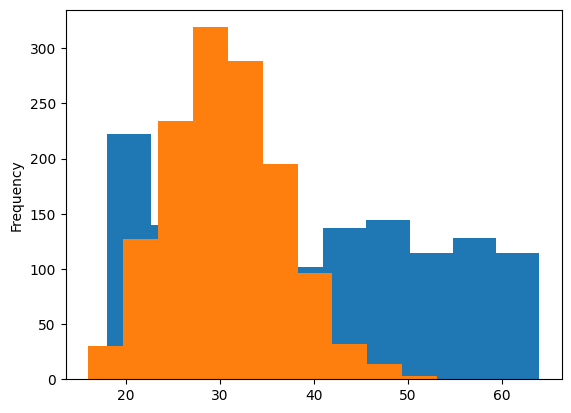

In [ ]:
X["age"].plot(kind='hist')
X["bmi"].plot(kind="hist")

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

#Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), #turn all values in these columns between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)
#Create X&y
X=insurance.drop("charges", axis=1)
y=insurance["charges"]
#Split training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
#Fit the column transformer to our training data
ct.fit(X_train)
#Transform training and test data with normalization and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [ ]:
X_train.loc[0], X_train_normal[0]

(age                19
 sex            female
 bmi              27.9
 children            0
 smoker            yes
 region      southwest
 Name: 0, dtype: object,
 array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
        1.        , 0.        , 0.        , 1.        , 0.        ,
        0.        ]))

In [ ]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

In [ ]:
#1. Create a model using Sequential API
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation ="relu"),
    tf.keras.layers.Dense(100, activation ="relu"),
    tf.keras.layers.Dense(100, activation ="relu"),
    tf.keras.layers.Dense(1)
])

#2. Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae, #mean absolute error between actual value and prediction
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), #stochastic gradient descent
              metrics = ["mae"])

#3.Fit the model
history = insurance_model_3.fit(X_train_normal, y_train, epochs=200, verbose=0)

In [ ]:
insurance_model_3.evaluate(X_test_normal, y_test)

9/9 [==============================] - 1s 6ms/step - loss: 1840.9961 - mae: 1840.9961


[1840.99609375, 1840.99609375]